In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.shape

(284807, 31)

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
dataset.duplicated().any()

True

In [10]:
dataset.drop_duplicates(subset=None, inplace=True)

In [11]:
dataset.shape

(283726, 31)

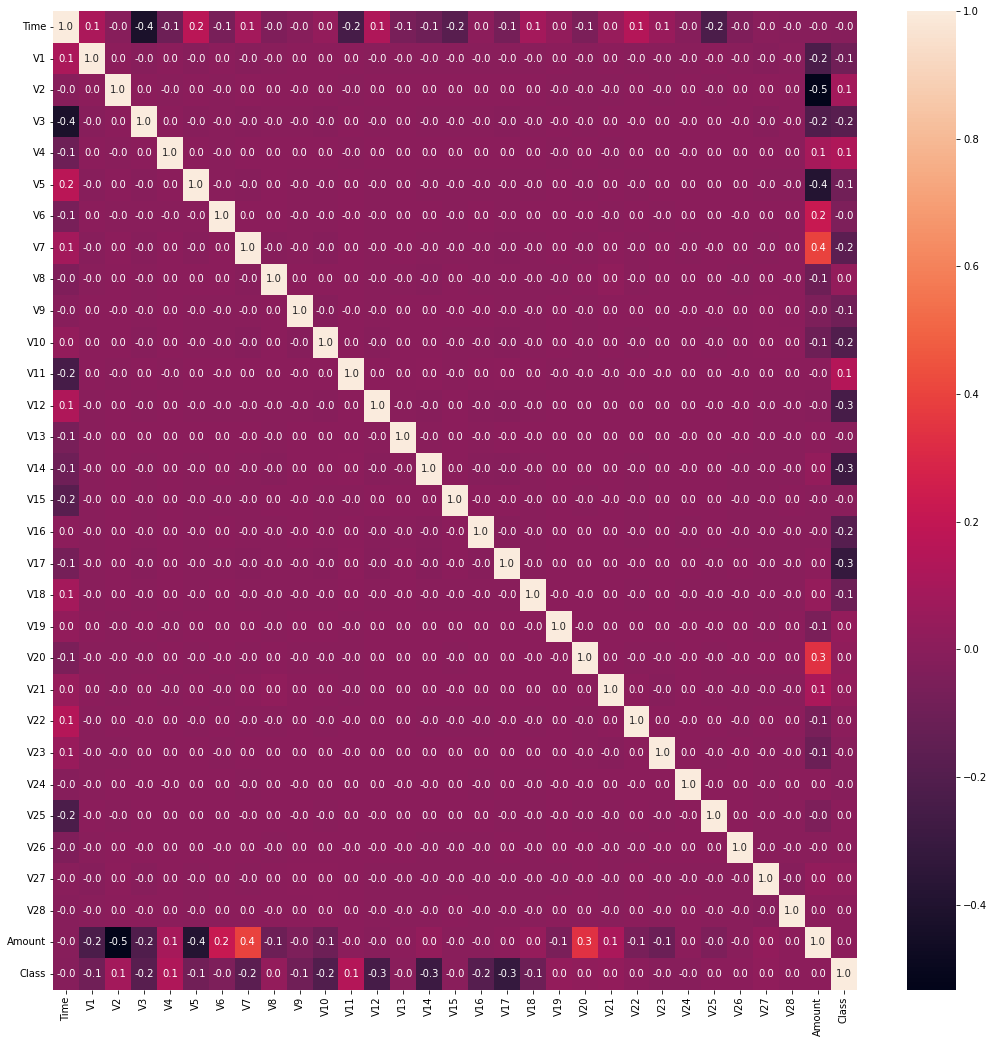

In [12]:
plt.figure(figsize=(18,18))
sns.heatmap(dataset.corr(), annot=True, fmt=".1f");

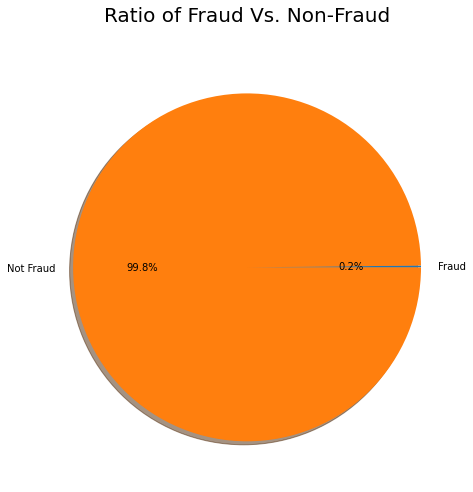

In [13]:
fraud = len(dataset[dataset['Class']==1])
notfraud = len(dataset[dataset['Class']==0])

labels = "Fraud","Not Fraud"
sizes = [fraud, notfraud]

plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud Vs. Non-Fraud\n', fontsize=20)
sns.set_context('paper', font_scale=2)

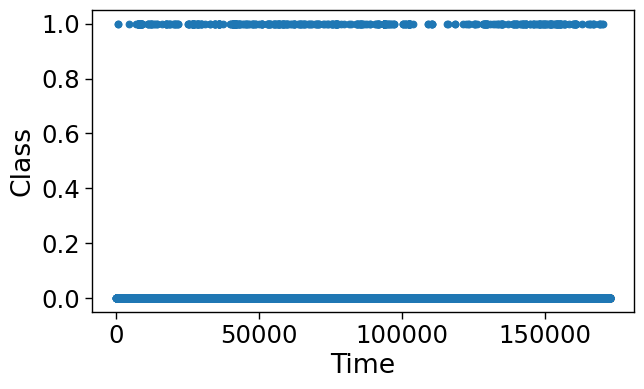

In [14]:
plt.figure(figsize=(7,4), dpi=100)
plt.scatter(dataset.Time,dataset.Class)
plt.xlabel("Time")
plt.ylabel("Class")
plt.show()

## Data Pre-processing

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset['normalizedAmount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(['Amount'], axis = 1)

In [16]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [17]:
dataset = dataset.drop(['Time'], axis = 1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [18]:
X = dataset.iloc[:, dataset.columns != 'Class'].values
y = dataset.iloc[:, dataset.columns == 'Class'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

In [20]:
X_train.shape

(198608, 29)

In [21]:
X_test.shape

(85118, 29)

## Model Preparation

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
random_forest = RandomForestClassifier(n_estimators=100)

In [24]:
random_forest.fit(X_train, y_train)

C:\Users\HP010\AppData\Local\Temp\ipykernel_12392\2566748861.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


RandomForestClassifier()

In [25]:
y_pred = random_forest.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

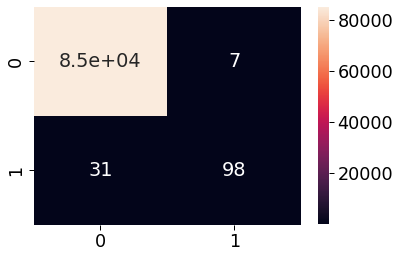

In [28]:
sns.heatmap(cm, annot = True)

In [29]:
print(cm)

[[84982     7]
 [   31    98]]


<AxesSubplot:xlabel='Class', ylabel='count'>

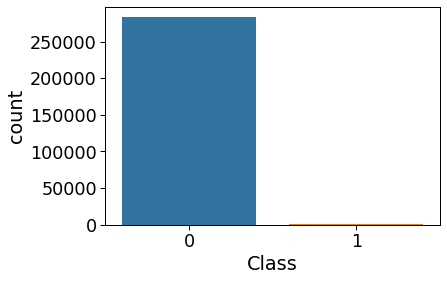

In [30]:
sns.countplot(x = 'Class', data=dataset)

In [31]:
from imblearn.under_sampling import NearMiss

In [32]:
ns = NearMiss()

In [33]:
X_train_ns, Y_train_ns = ns.fit_resample(X_train,y_train)

In [34]:
len(Y_train_ns)

688

In [35]:
len(y_train)

198608

In [36]:
classifier = RandomForestClassifier()
classifier.fit(X_train_ns,Y_train_ns)

RandomForestClassifier()

In [37]:
X_test_ns, Y_test_ns = ns.fit_resample(X_test,y_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Y_pred = classifier.predict(X_test_ns)
print(confusion_matrix(Y_test_ns, Y_pred))
print(accuracy_score(Y_test_ns,Y_pred))
print(classification_report(Y_test_ns,Y_pred))

[[105  24]
 [ 11 118]]
0.8643410852713178
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       129
           1       0.83      0.91      0.87       129

    accuracy                           0.86       258
   macro avg       0.87      0.86      0.86       258
weighted avg       0.87      0.86      0.86       258



In [39]:
# Over Sampling

from imblearn.over_sampling import RandomOverSampler

In [40]:
os = RandomOverSampler()

In [41]:
X_train_os, Y_train_os = os.fit_resample(X_train,y_train)

In [42]:
len(Y_train_os[Y_train_os==1])

198264

In [43]:
classifier.fit(X_train_os,Y_train_os)

RandomForestClassifier()

In [44]:
y_pred1 = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[84982     7]
 [   35    94]]
0.9995065673535563
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.93      0.73      0.82       129

    accuracy                           1.00     85118
   macro avg       0.97      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [47]:
y_test = np.concatenate(y_test)

c:\python3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

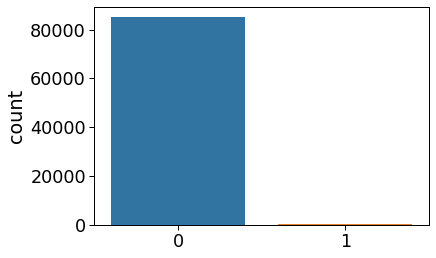

In [48]:
sns.countplot(y_test)

In [49]:
random_forest_resampled = RandomForestClassifier(n_estimators=100)

In [50]:
random_forest_resampled.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = random_forest_resampled.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

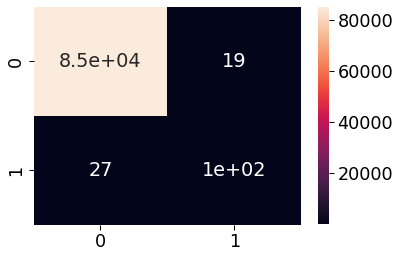

In [53]:
sns.heatmap(cm, annot = True)

In [54]:
print(cm)

[[84970    19]
 [   27   102]]


In [55]:
from sklearn.metrics import classification_report

In [56]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     84989\n           1       0.84      0.79      0.82       129\n\n    accuracy                           1.00     85118\n   macro avg       0.92      0.90      0.91     85118\nweighted avg       1.00      1.00      1.00     85118\n'

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.84      0.79      0.82       129

    accuracy                           1.00     85118
   macro avg       0.92      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [58]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.8952370580378801


Text(0.5, 0, 'False Positive Rate')

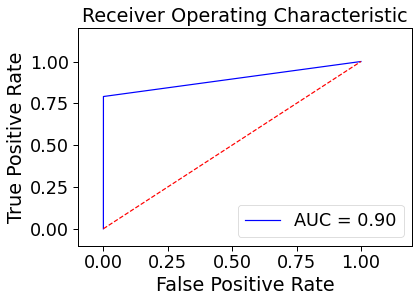

In [59]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [60]:
pickle.dump(random_forest_resampled, open('trained_model.pkl', 'wb'))